Saving Daily Household Transactions.csv to Daily Household Transactions (4).csv


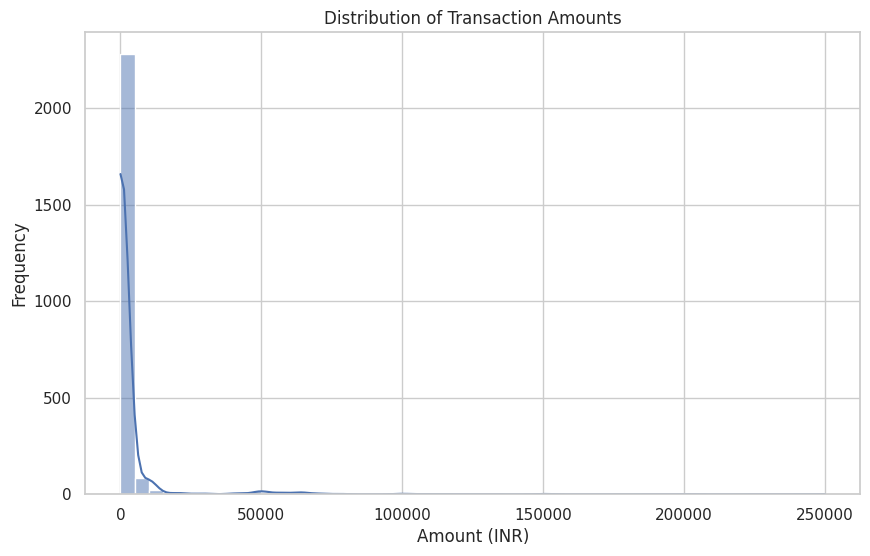

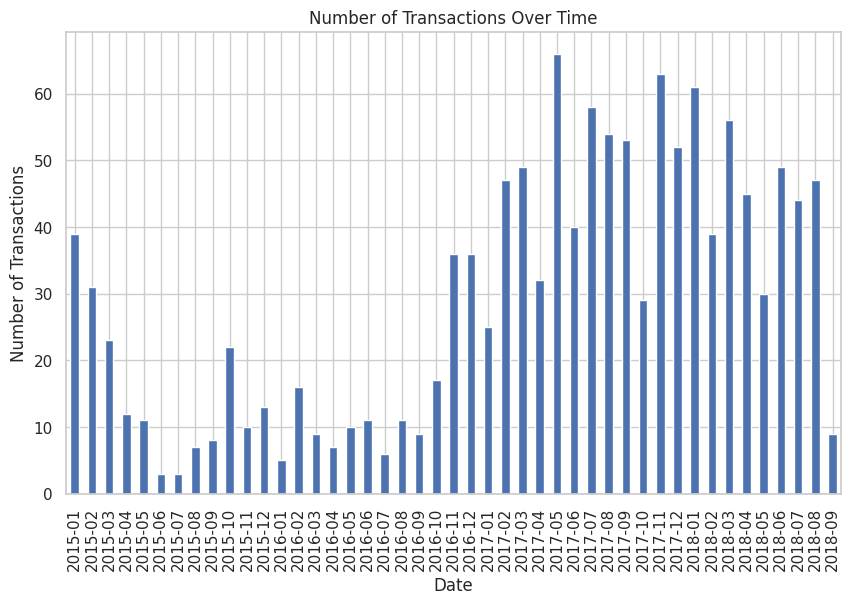

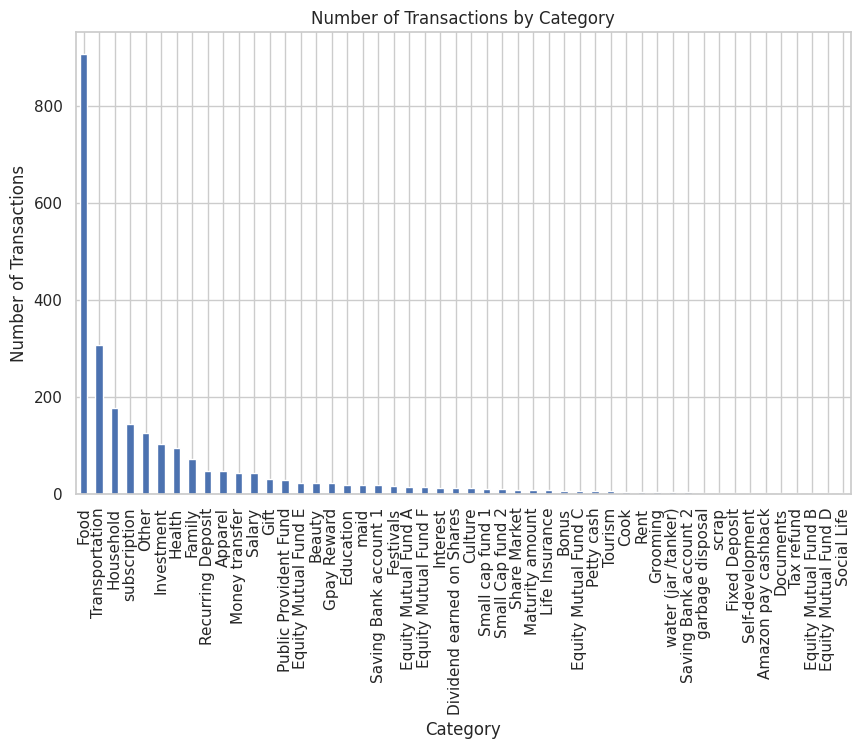

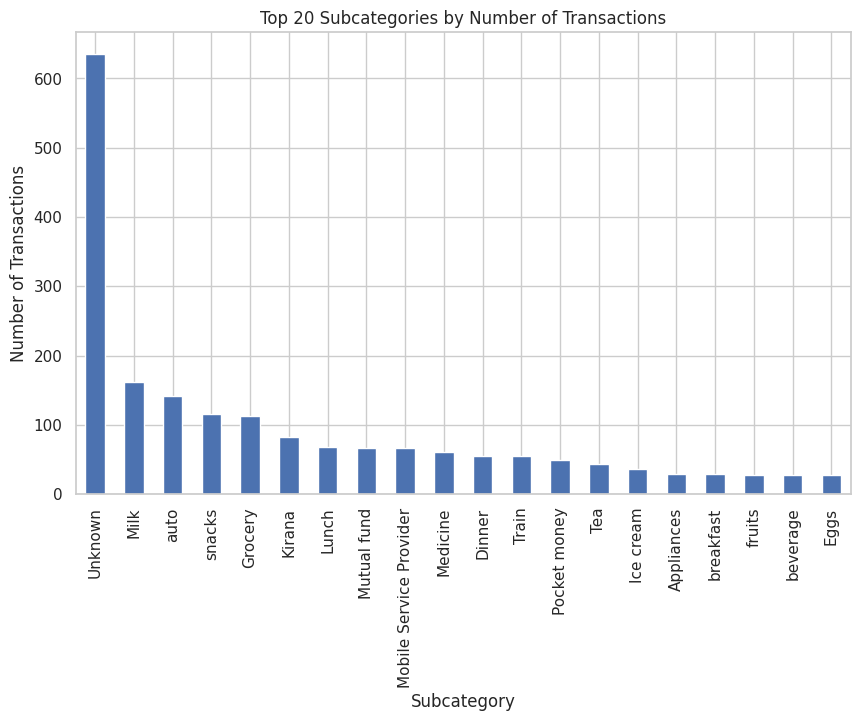

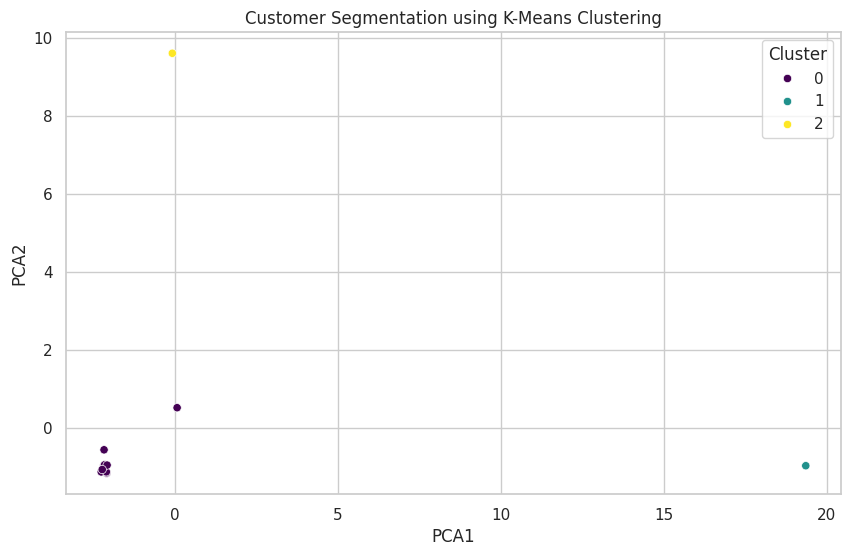

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import io
from google.colab import files


# For DEP pakistan instructor who will check the file
# You can run this program on Google Collab
# when you will run the program it will ask for dataset then simply upload it by selecting the attached dataset once downloaded in your computer

# To Upload the file
uploaded_file = files.upload()

# Get the filename
filename = next(iter(uploaded_file))

# Reading the File via Pandas
data = pd.read_csv(io.BytesIO(uploaded_file[filename]))

# Task 1.1

# Data Cleaning and Preprocessing
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Fill missing values in 'Subcategory' with a placeholder
data['Subcategory'] = data['Subcategory'].fillna('Unknown')

# Fill missing values in 'Note' with an empty string
data['Note'] = data['Note'].fillna('')
data['Amount'] = data['Amount'].astype(float)

# Task 1.2

# Exploratory Data Analysis (EDA)
# Setting the style via Seaborn
sns.set(style="whitegrid")

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

# Distribution of transactions over time
plt.figure(figsize=(10, 6))
data['Date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Breakdown of transactions by Category
plt.figure(figsize=(10, 6))
data['Category'].value_counts().plot(kind='bar')
plt.title('Number of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

# Breakdown of transactions by Subcategory
plt.figure(figsize=(10, 6))
data['Subcategory'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Subcategories by Number of Transactions')
plt.xlabel('Subcategory')
plt.ylabel('Number of Transactions')
plt.show()

# Task 1.3
# Clustering Algorithms (e.g., K-means)
agg_data = data.pivot_table(index='Mode', columns='Category', values='Amount', aggfunc='sum', fill_value=0)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_data)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
kmeans.fit(scaled_data)

# Add cluster labels to the original data
agg_data['Cluster'] = kmeans.labels_

# Task 1.4
# Visualization of Customer Segments

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
agg_data['PCA1'] = pca_data[:, 0]
agg_data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=agg_data, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()
